In [1]:
# 1. Import packages
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import os, datetime
import numpy as np
import random
import cv2

In [2]:
# 2. Data loading
data = r"C:\Users\artsc\Desktop\TensorFlow\Assessment3\Concrete Crack Images for Classification"
neg_class = r"C:\Users\artsc\Desktop\TensorFlow\Assessment3\Concrete Crack Images for Classification\Negative"
pos_class = r"C:\Users\artsc\Desktop\TensorFlow\Assessment3\Concrete Crack Images for Classification\Positive"

The number of Negative images: 20000
The number of Positive images: 20000


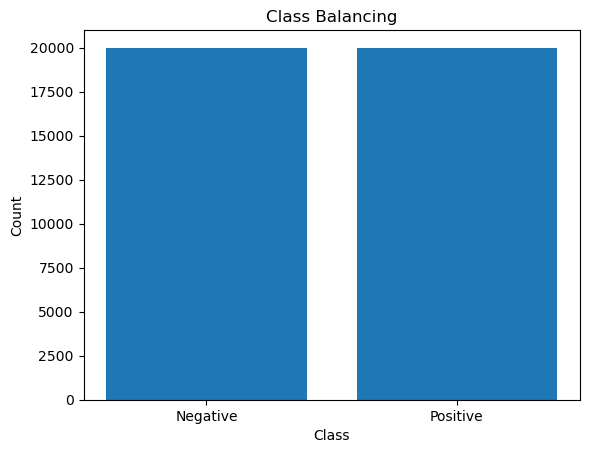

In [3]:
# 3. Display the number in each image classP
neg = len(os.listdir(neg_class))
pos = len(os.listdir(pos_class))
print(f"The number of Negative images: {neg}")
print(f"The number of Positive images: {pos}")

plt.bar(["Negative","Positive"],[neg,pos])
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

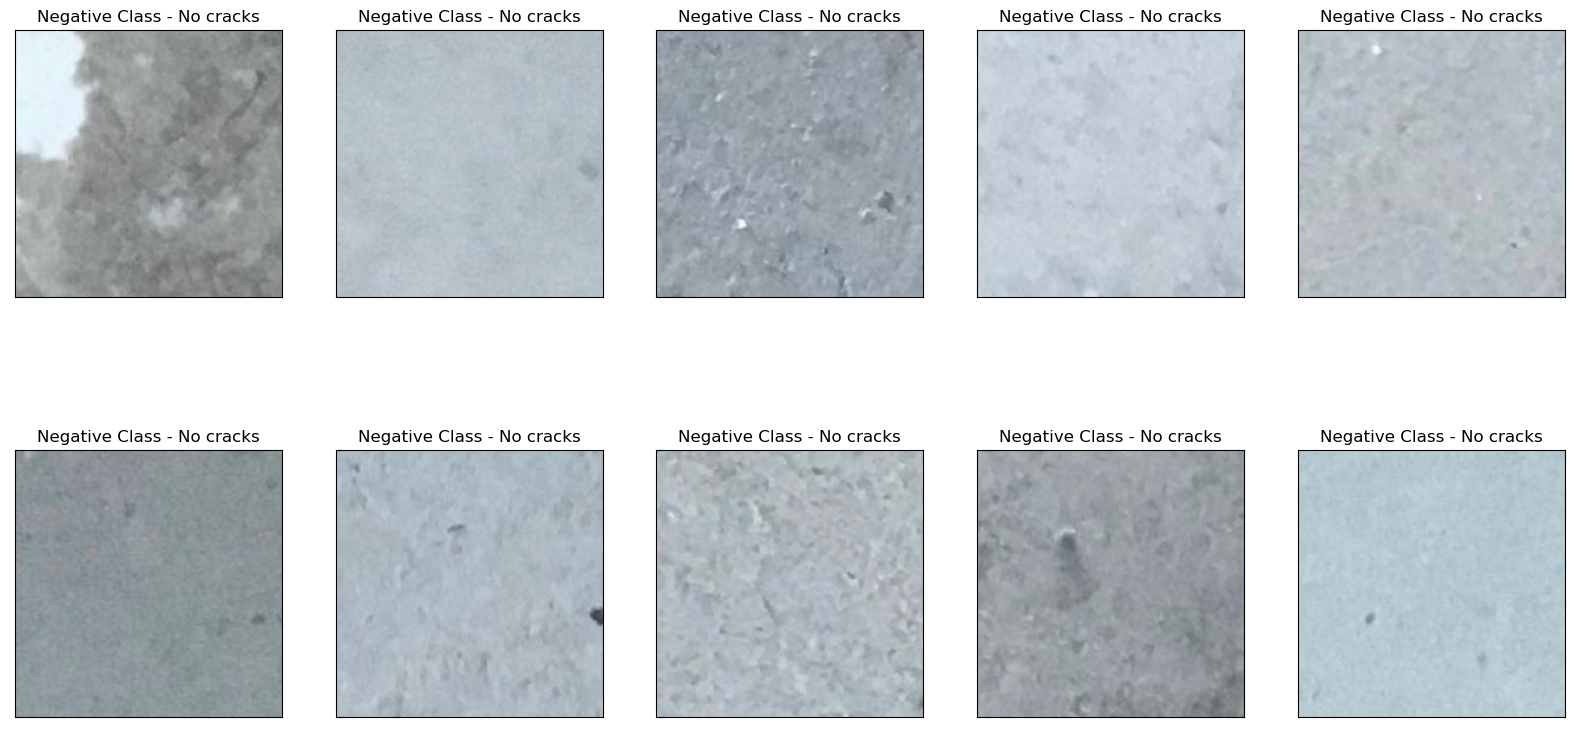

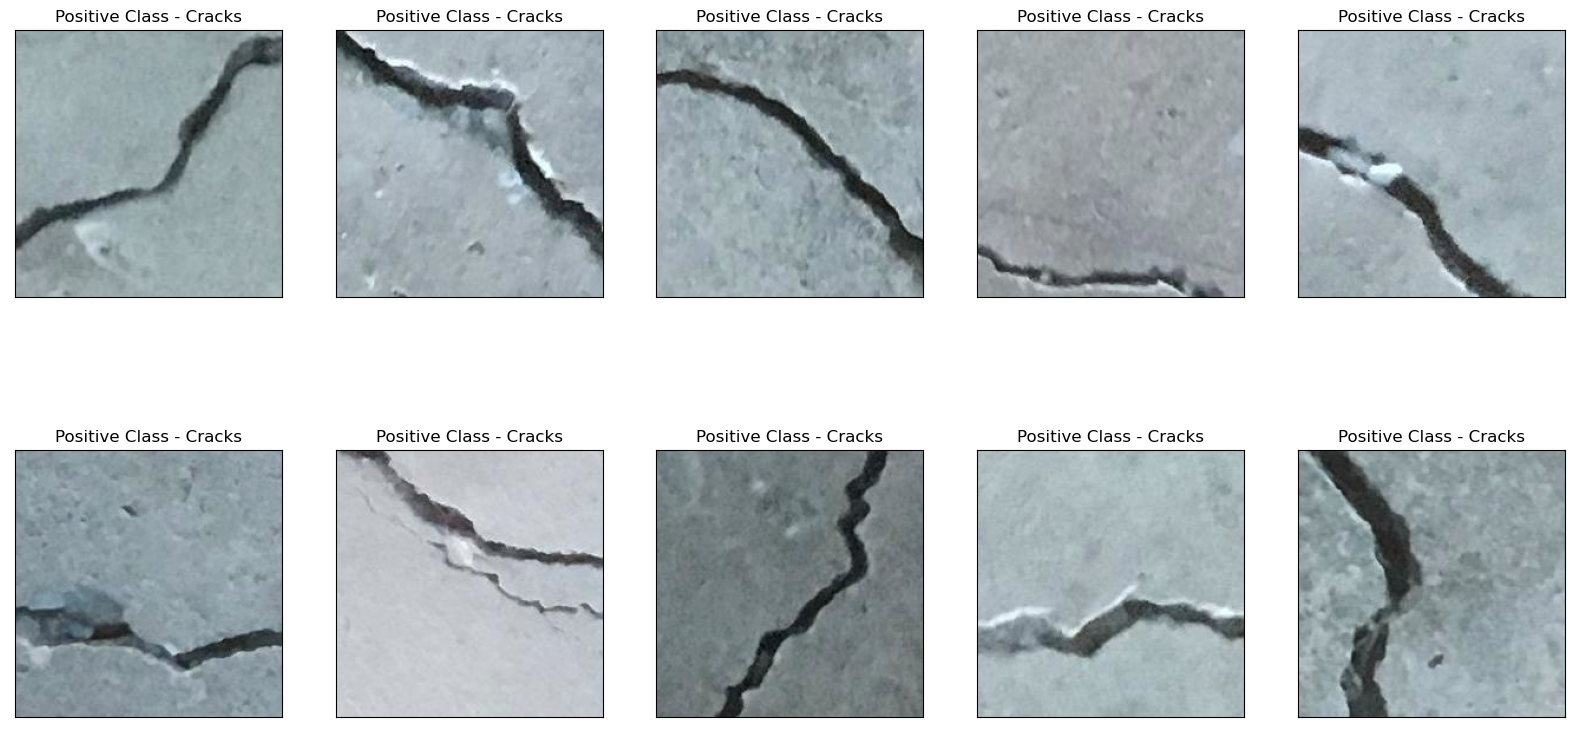

In [4]:
# 4. Display some images as examples
neg_list = os.listdir(neg_class)
random.shuffle(neg_list)
neg_list = neg_list[:10]

pos_list = os.listdir(pos_class)
random.shuffle(pos_list)
pos_list = pos_list[:10]

count = 1
plt.figure(figsize=(20,10))
for item in neg_list:
    plt.subplot(2,5,count)
    img = cv2.imread(neg_class + "/" + item)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    count = count + 1
    plt.title("Negative Class - No cracks")

count = 1
plt.figure(figsize=(20,10))
for item in pos_list:
    plt.subplot(2,5,count)
    img = cv2.imread(pos_class + "/" + item)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    count = count + 1
    plt.title("Positive Class - Cracks")

In [5]:
# 6. Model creation

model = keras.Sequential()

# (A) Input layer
model.add(layers.InputLayer(input_shape=img.shape))

# (B) Feature extractor
model.add(keras.layers.Conv2D(8,(3,3),activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(keras.layers.Conv2D(16,(3,3),activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(3,3))

# (C) Classifier
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [6]:
#7. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



train_gen = image_dataset_from_directory(directory=data,
                                         batch_size=64,
                                         image_size=(227, 227))
test_gen = image_dataset_from_directory(directory=data,
                                        batch_size=1,
                                        image_size=(227, 227))
rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 40000 files belonging to 2 classes.
Found 40000 files belonging to 2 classes.


In [7]:
# 8. Setup TensorBoard callback
log_path = os.path.join('log_dir', 'concrete_crack', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tb = callbacks.TensorBoard(log_path)

In [8]:
# 9. Model training
EPOCHS = 5
history = model.fit(train_gen, validation_data=test_gen,
          epochs = EPOCHS, callbacks=[tb])

Epoch 1/5
625/625 [==============================] - 1061s 2s/step - loss: 0.0821 - accuracy: 0.9725 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 2/5
625/625 [==============================] - 1062s 2s/step - loss: 0.0346 - accuracy: 0.9898 - val_loss: 0.0222 - val_accuracy: 0.9934
Epoch 3/5
625/625 [==============================] - 1137s 2s/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0614 - val_accuracy: 0.9821
Epoch 4/5
625/625 [==============================] - 1312s 2s/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0130 - val_accuracy: 0.9964
Epoch 5/5
625/625 [==============================] - 1399s 2s/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0209 - val_accuracy: 0.9941


In [9]:
# 10. Model deployment
y_pred = np.argmax(model.predict(test_gen), axis=1)

In [10]:
# 11. Model save

model.save('model.h5')